<a href="https://colab.research.google.com/github/nishitag21/QuantInsti/blob/main/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
start = '2019-05-01'
end = '2020-08-01'

In [ ]:
symbol = 'HINDUNILVR.NS'

In [ ]:
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


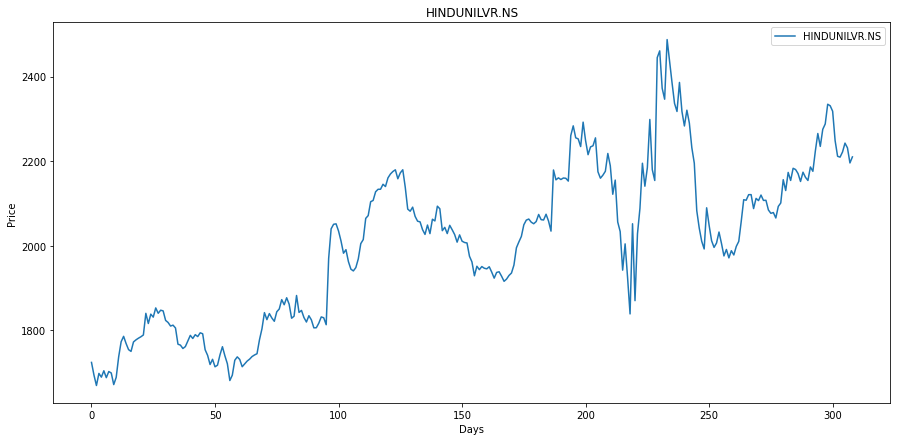

In [ ]:
series = df['Close']
series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))
plt.title(symbol)

plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label=symbol)

plt.legend()
plt.show()

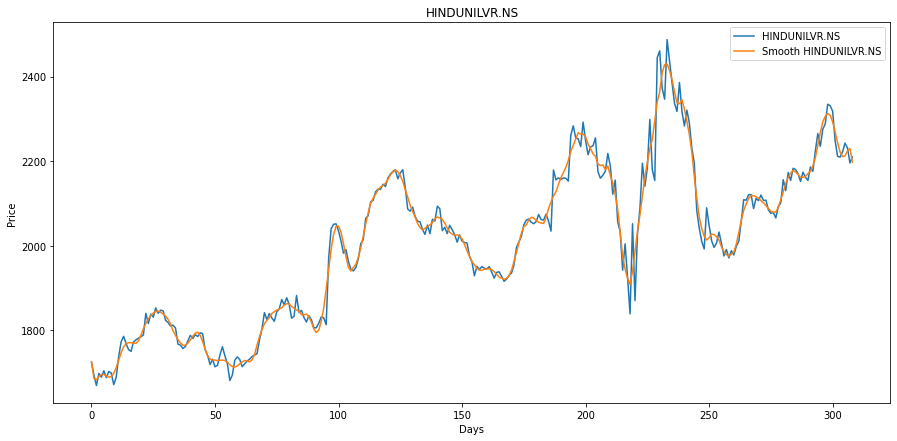

In [ ]:
from scipy.signal import savgol_filter

# To find amount of data in months
month_diff = series.shape[0] // 30
# We need value to be greater than 0
if month_diff == 0:
    month_diff = 1

# Algo to determine smoothness
smooth = int(2 * month_diff + 3)

# Smooth price data
points = savgol_filter(series, smooth,7 )

# Plot the smooth price graph over default price graph
plt.figure(figsize=(15,7))
plt.title(symbol)

plt.xlabel('Days')
plt.ylabel('Price')

# Close price data
plt.plot(series, label=symbol)

# Smooth close price data
plt.plot(points, label=f'Smooth {symbol}')

plt.legend()
plt.show()

In [ ]:
# Pythagoras function to calculate distance between two points
def pythg(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)


# Function to calculate local minima and maxima points
def loc_min_max(points):
    loc_minima = []
    loc_maxima = []
    prev_pts = [(0, points[0]), (1, points[1])]
    for i in range(1, len(points) - 1):
        append_to = ''
        if points[i-1] > points[i] < points[i+1]:
            append_to = 'min'
        elif points[i-1] < points[i] > points[i+1]:
            append_to = 'max'
        if append_to:
            if loc_minima or loc_maxima:
                prev_distance = pythg(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythg(prev_pts[1], (i, points[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, points[i])
                    if append_to == 'min':
                        loc_minima.append((i, points[i]))
                    else:
                        loc_maxima.append((i, points[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, points[i])
                if append_to == 'min':
                    loc_minima.append((i, points[i]))
                else:
                    loc_maxima.append((i, points[i]))
                    
    return loc_minima, loc_maxima

# Store the local minima and maxima points
loc_minima, loc_maxima = loc_min_max(points)
minima_pts = np.array(loc_minima)
maxima_pts = np.array(loc_maxima)

In [ ]:
plt.figure(figsize=(15,7))
plt.title(symbol)

plt.xlabel('Days')
plt.ylabel('Price')

plt.scatter(loc_minima)



In [ ]:
print(points)

[1725.01457292 1685.03752163 1682.76242296 1690.28799345 1695.28597497
 1694.9619483  1691.49241059 1688.76347517 1690.23655183 1697.76636619
 1711.1966764  1728.55904541 1746.57926812 1760.19528971 1767.56208688
 1770.29744004 1770.1139525  1769.10552112 1768.61411905 1774.69085221
 1787.6291755  1802.81600755 1815.5713478  1826.19714508 1835.14343387
 1840.25635777 1843.91299741 1844.91610859 1842.00765158 1838.09030672
 1833.22758305 1825.03494174 1814.54337649 1798.59019433 1787.56550652
 1777.67557863 1769.74754682 1764.18507997 1763.89063248 1769.16700943
 1776.66352605 1785.57687327 1792.42970931 1795.18173022 1787.50089929
 1772.98551353 1755.21015988 1738.89313982 1731.42743343 1729.32844051
 1729.03583353 1727.94134661 1728.7852653  1729.01231538 1728.15507284
 1723.82719497 1718.00805995 1713.82331935 1712.58133135 1715.00576185
 1720.12101619 1724.80072383 1728.07410048 1727.2305355  1724.71755418
 1729.90595474 1742.29587211 1764.43978272 1784.3032     1801.26554883
 1814.